# Bermudan Swaption Pricing using HW, BK and BDT Models

Value a Bermudan Swaption using the Hull-White, Black-Derman-Toy and Black-Karasinski models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.products.libor import *

from financepy.market.curves.FinDiscountCurve import FinDiscountCurve
from financepy.market.curves.FinDiscountCurveFlat import FinDiscountCurveFlat

from financepy.models.FinModelRatesHW import FinModelRatesHW
from financepy.models.FinModelRatesBK import FinModelRatesBK
from financepy.models.FinModelRatesBDT import FinModelRatesBDT

###################################################################
#   WELCOME TO FINANCEPY BETA VERSION 0.171 UNDER DEVELOPMENT      #
# FinancePy it is distributed FREE & WITHOUT ANY WARRANTY AND     #
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. For more   #
# details see the repo at https://github.com/domokane/FinancePy   #
###################################################################



## Discount Curve

In [3]:
valuationDate = FinDate(1, 1, 2020)
settlementDate = valuationDate

Set up flat discount curve at 6% (semi-annual compounding)

In [4]:
discountCurve = FinDiscountCurveFlat(settlementDate, 0.04, FinFrequencyTypes.SEMI_ANNUAL)

# European Swaptions

We begin with European swaptions. European swaptions can be set up directly as European Swaptions or as Bermudan swaptions with an exercise type of EUROPEAN

In [5]:
exerciseDate = settlementDate.addYears(1)
swapMaturityDate = settlementDate.addYears(4)
swapFixedCoupon = 0.06
swapFixedFrequencyType = FinFrequencyTypes.SEMI_ANNUAL
swapFixedDayCountType = FinDayCountTypes.ACT_365_ISDA

In [6]:
europeanSwaptionPay = FinLiborBermudanSwaption(settlementDate,
                                               exerciseDate,
                                               swapMaturityDate,
                                               FinLiborSwaptionTypes.PAYER,
                                               FinOptionExerciseTypes.EUROPEAN,
                                               swapFixedCoupon,
                                               swapFixedFrequencyType,
                                               swapFixedDayCountType)

In [7]:
europeanSwaptionRec = FinLiborBermudanSwaption(settlementDate,
                                               exerciseDate,
                                               swapMaturityDate,
                                               FinLiborSwaptionTypes.RECEIVER,
                                               FinOptionExerciseTypes.EUROPEAN,
                                               swapFixedCoupon,
                                               swapFixedFrequencyType,
                                               swapFixedDayCountType)

## Valuation using BDT Model

In [8]:
sigma = 0.2012
numTimeSteps = 500

In [9]:
modelBDT = FinModelRatesBDT(sigma, numTimeSteps)

In [10]:
value = europeanSwaptionPay.value(valuationDate, discountCurve, modelBDT)
print("EUROPEAN BK PAY Value:", value)

EUROPEAN BK PAY Value: 223.67682818569136


In [11]:
value = europeanSwaptionRec.value(valuationDate, discountCurve, modelBDT)
print("EUROPEAN BK REC Value:", value)

EUROPEAN BK REC Value: 54054.64155262782


In [12]:
print(europeanSwaptionPay)

EXERCISE DATE: FRI 1 JAN 2021
MATURITY DATE: MON 1 JAN 2024
SWAPTION TYPE: FinLiborSwaptionTypes.PAYER
EXERCISE TYPE: FinOptionExerciseTypes.EUROPEAN
FIXED COUPON: 0.06
FIXED FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
FIXED DAYCOUNT TYPE: FinDayCountTypes.ACT_365_ISDA
FLOAT FREQUENCY: FinFrequencyTypes.QUARTERLY
FLOAT DAYCOUNT TYPE: FinDayCountTypes.THIRTY_360
NOTIONAL: 1000000



# Bermudan Swaptions

This swaption can be exercised starting in one year and the underlying swap matures in 4 years

In [13]:
exerciseDate = settlementDate.addYears(1)
swapMaturityDate = settlementDate.addYears(4)
swapFixedCoupon = 0.060

In [14]:
swapFixedFrequencyType = FinFrequencyTypes.SEMI_ANNUAL
swapFixedDayCountType = FinDayCountTypes.THIRTY_E_360_ISDA

The swaption is Bermudan so it can only be exercised on coupon payment dates

Create a payer swaption first

In [15]:
bermudanSwaptionPay = FinLiborBermudanSwaption(settlementDate,
                                               exerciseDate,
                                               swapMaturityDate,
                                               FinLiborSwaptionTypes.PAYER,
                                               FinOptionExerciseTypes.BERMUDAN,
                                               swapFixedCoupon,
                                               swapFixedFrequencyType,
                                               swapFixedDayCountType)

Create a receiver swaption

In [16]:
bermudanSwaptionRec = FinLiborBermudanSwaption(settlementDate,
                                               exerciseDate,
                                               swapMaturityDate,
                                               FinLiborSwaptionTypes.RECEIVER,
                                               FinOptionExerciseTypes.BERMUDAN,
                                               swapFixedCoupon,
                                               swapFixedFrequencyType,
                                               swapFixedDayCountType)

## Valuation using the BK Model

In [17]:
sigma = 0.2012
a = 0.02
numTimeSteps = 400

In [18]:
modelBK = FinModelRatesBK(sigma, a, numTimeSteps)

Now specify the put and call dates

In [19]:
value = bermudanSwaptionPay.value(valuationDate, discountCurve, modelBK)
print("Bermudan BK PAY Value:", value)

Bermudan BK PAY Value: 1337.0530027720947


In [20]:
value = bermudanSwaptionRec.value(valuationDate, discountCurve, modelBK)
print("Bermudan BK REC Value:", value)

Bermudan BK REC Value: 45177.61607975585


## Valuation using the BDT Model

In [21]:
sigma = 0.2012
numTimeSteps = 500

In [22]:
modelBDT = FinModelRatesBDT(sigma, numTimeSteps)

In [23]:
value = bermudanSwaptionPay.value(valuationDate, discountCurve, modelBDT)
print("Bermudan BDT PAY Value:", value)

Bermudan BDT PAY Value: 1516.668955451756


In [24]:
value = bermudanSwaptionRec.value(valuationDate, discountCurve, modelBDT)
print("Bermudan BDT REC Value:", value)

Bermudan BDT REC Value: 54413.92082591884


In [25]:
print(bermudanSwaptionPay)

EXERCISE DATE: FRI 1 JAN 2021
MATURITY DATE: MON 1 JAN 2024
SWAPTION TYPE: FinLiborSwaptionTypes.PAYER
EXERCISE TYPE: FinOptionExerciseTypes.BERMUDAN
FIXED COUPON: 0.06
FIXED FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
FIXED DAYCOUNT TYPE: FinDayCountTypes.THIRTY_E_360_ISDA
FLOAT FREQUENCY: FinFrequencyTypes.QUARTERLY
FLOAT DAYCOUNT TYPE: FinDayCountTypes.THIRTY_360
NOTIONAL: 1000000



## Valuation using the HW Model

In [26]:
sigma = 0.01  # basis point volatility
a = 0.01
numTimeSteps = 100

In [27]:
modelHW = FinModelRatesHW(a, sigma, numTimeSteps)

In [28]:
value = bermudanSwaptionPay.value(valuationDate, discountCurve, modelHW)
print("Bermudan HW PAY Value:", value)

Bermudan HW PAY Value: 1610.7615683580825


In [29]:
value = bermudanSwaptionRec.value(valuationDate, discountCurve, modelHW)
print("Bermudan HW REC Value:", value)

Bermudan HW REC Value: 54277.89561156017


# Convergence Testing

## BK Model

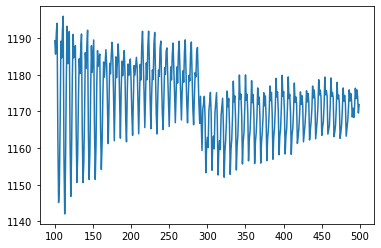

In [30]:
sigma = 0.2012
a = 0.04

timeSteps = range(100,500,1)
values = []
for numTimeSteps in timeSteps:
    modelBK = FinModelRatesBK(sigma, a, numTimeSteps)
    v = bermudanSwaptionPay.value(valuationDate, discountCurve, modelBK)
    values.append(v)

plt.plot(timeSteps, values);

## BDT Model

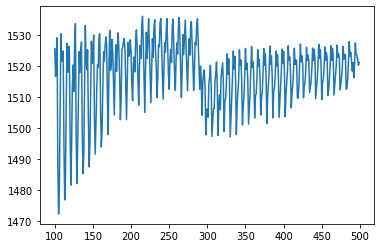

In [31]:
sigma = 0.2012

timeSteps = range(100,500,1)
values = []
for numTimeSteps in timeSteps:
    modelBDT = FinModelRatesBDT(sigma, numTimeSteps)
    v = bermudanSwaptionPay.value(settlementDate, discountCurve, modelBDT)
    values.append(v)
    
plt.plot(timeSteps, values);

## HW Model

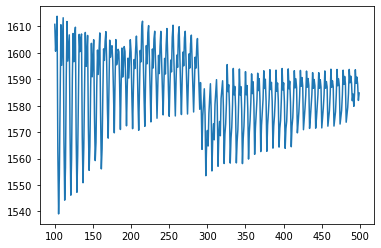

In [32]:
sigma = 0.01  # basis point volatility
a = 0.01
timeSteps = range(100,500,1)
values = []

for numTimeSteps in timeSteps:
    modelHW = FinModelRatesHW(a, sigma, numTimeSteps)
    v = bermudanSwaptionPay.value(settlementDate, discountCurve, modelHW)
    values.append(v)
    
plt.plot(timeSteps, values);

In all 3 cases there is something happening at 300 time steps that needs investigation

Copyright (c) 2020 Dominic O'Kane